
# Advanced Recommender Systems with Python

Welcome to the code notebook for creating Advanced Recommender Systems with Python. This is an optional lecture notebook for you to check out. Currently there is no video for this lecture because of the level of mathematics used and the heavy use of SciPy here.

Recommendation Systems usually rely on larger data sets and specifically need to be organized in a particular fashion. Because of this, we won't have a project to go along with this topic, instead we will have a more intensive walkthrough process on creating a recommendation system with Python with the same Movie Lens Data Set.

*Note: The actual mathematics behind recommender systems is pretty heavy in Linear Algebra.*
___

## Methods Used

Two most common types of recommender systems are **Content-Based** and **Collaborative Filtering (CF)**. 

* Collaborative filtering produces recommendations based on the knowledge of users’ attitude to items, that is it uses the "wisdom of the crowd" to recommend items. 
* Content-based recommender systems focus on the attributes of the items and give you recommendations based on the similarity between them.

## Collaborative Filtering

In general, Collaborative filtering (CF) is more commonly used than content-based systems because it usually gives better results and is relatively easy to understand (from an overall implementation perspective). The algorithm has the ability to do feature learning on its own, which means that it can start to learn for itself what features to use. 

CF can be divided into **Memory-Based Collaborative Filtering** and **Model-Based Collaborative filtering**. 

In this tutorial, we will implement Model-Based CF by using singular value decomposition (SVD) and Memory-Based CF by computing cosine similarity. 

## The Data

We will use famous MovieLens dataset, which is one of the most common datasets used when implementing and testing recommender engines. It contains 100k movie ratings from 943 users and a selection of 1682 movies.

You can download the dataset [here](http://files.grouplens.org/datasets/movielens/ml-100k.zip) or just use the u.data file that is already included in this folder.

____
## Getting Started

Let's import some libraries we will need:

In [1]:
import numpy as np
import pandas as pd

We can then read in the **u.data** file, which contains the full dataset. You can read a brief description of the dataset [here](http://files.grouplens.org/datasets/movielens/ml-100k-README.txt).

Note how we specify the separator argument for a Tab separated file.

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

Let's take a quick look at the data.

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Note how we only have the item_id, not the movie name. We can use the Movie_ID_Titles csv file to grab the movie names and merge it with this dataframe:

In [4]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Then merge the dataframes:

In [5]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


Now let's take a quick look at the number of unique users and movies.

In [6]:
n_users = df.user_id.nunique()
n_items = df.item_id.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_items))

Num. of Users: 944
Num of Movies: 1682


## Train Test Split

Recommendation Systems by their very nature are very difficult to evaluate, but we will still show you how to evaluate them in this tutorial. In order to do this, we'll split our data into two sets. However, we won't do our classic X_train,X_test,y_train,y_test split. Instead we can actually just segement the data into two sets of data:

In [15]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25)

In [21]:
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [27]:
print('Num. of Users: '+ str(df.user_id.nunique()))
print('Num of Movies: '+str(df.item_id.nunique()))

Num. of Users: 944
Num of Movies: 1682


In [23]:
test_data

,user_id,item_id,rating,timestamp,title
8725,833,100,4,875036169,Fargo (1996)
30756,721,127,5,877140409,"Godfather, The (1972)"
18258,499,174,3,885598961,Raiders of the Lost Ark (1981)
56008,807,121,4,892529278,Independence Day (ID4) (1996)
15921,506,209,4,874873529,This Is Spinal Tap (1984)
...,...,...,...,...,...
68994,553,131,5,879948655,Breakfast at Tiffany's (1961)
18888,130,307,4,877984546,"Devil's Advocate, The (1997)"
85540,318,63,3,884496932,"Santa Clause, The (1994)"
95668,114,1104,5,881260352,C'est arrivé près de chez vous (1992)


In [28]:
print('Num. of Users: '+ str(test_data.user_id.nunique()))
print('Num of Movies: '+str(test_data.item_id.nunique()))

Num. of Users: 943
Num of Movies: 1457


In [25]:
train_data

,user_id,item_id,rating,timestamp,title
85283,424,990,5,880858979,Anna Karenina (1997)
49305,70,596,3,884148728,"Hunchback of Notre Dame, The (1996)"
69086,6,87,4,883602174,Searching for Bobby Fischer (1993)
65265,602,9,4,888638490,Dead Man Walking (1995)
59932,330,225,4,876544507,101 Dalmatians (1996)
...,...,...,...,...,...
4218,929,144,3,879640394,Die Hard (1988)
68579,835,162,5,891033420,On Golden Pond (1981)
36698,796,705,4,892690263,Singin' in the Rain (1952)
59647,625,692,3,892000518,"American President, The (1995)"


In [66]:
print('Num. of Users: '+ str(train_data.user_id.nunique()))
print('Num of Movies: '+str(train_data.item_id.nunique()))

Num. of Users: 944
Num of Movies: 1643


## Memory-Based Collaborative Filtering

In [12]:
#Create two user-item matrices, one for training and another for testing
#the split is such that every user rated at least 1 movie and every movie is rated by at least 1 person
train_data_matrix = np.zeros((n_users, n_items))
#iterate over dataframe return example Pandas(Index=85283, user_id=424, item_id=990, rating=5, timestamp=880858979, title='Anna Karenina (1997)')
for line in train_data.itertuples():
    #line[3] is rating
    #line[1]-1 is user_id-1
    #line[2]-1 is item_id-1
    #example
    #for Pandas(Index=85283, user_id=424, item_id=990, rating=5, ...)
    #in train_data_matrix[423, 989] = 5
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [45]:
pd.DataFrame(train_data_matrix)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,3.0,4.0,3.0,3.0,0.0,4.0,0.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

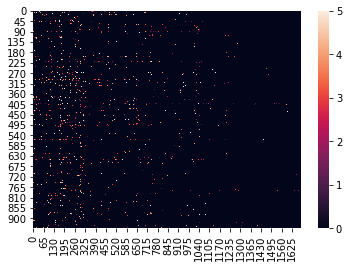

In [50]:
sns.heatmap(test_data_matrix)

In [54]:
#movies that nobody watched
pd.DataFrame(train_data_matrix).sum(axis=0).sort_values()

1446       0.0
1575       0.0
1578       0.0
1595       0.0
1658       0.0
         ...  
173     1352.0
257     1395.0
180     1515.0
99      1559.0
49      1943.0
Length: 1682, dtype: float64

In [56]:
#users that havent watched anything
pd.DataFrame(train_data_matrix).sum(axis=1).sort_values()

943      11.0
201      31.0
684      32.0
865      36.0
301      38.0
        ...  
6      1288.0
415    1462.0
654    1503.0
12     1553.0
449    1585.0
Length: 944, dtype: float64

In [58]:
pd.DataFrame(test_data_matrix).sum(axis=0).sort_values()

1681      0.0
1457      0.0
1459      0.0
1460      0.0
856       0.0
        ...  
285     472.0
180     517.0
257     541.0
99      552.0
49      603.0
Length: 1682, dtype: float64

In [60]:
pd.DataFrame(test_data_matrix).sum(axis=1).sort_values()

943      0.0
316      4.0
650      6.0
593      6.0
571      6.0
       ...  
415    434.0
654    489.0
449    502.0
302    508.0
275    508.0
Length: 944, dtype: float64

In [61]:
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


You can use the [pairwise_distances](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html) function from sklearn to calculate the cosine similarity. Note, the output will range from 0 to 1 since the ratings are all positive.

In [73]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [88]:
item_similarity

array([[0.        , 0.74257164, 0.74343023, ..., 1.        , 0.94590642,
        0.94590642],
       [0.74257164, 0.        , 0.82595071, ..., 1.        , 0.90862826,
        0.90862826],
       [0.74343023, 0.82595071, 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.94590642, 0.90862826, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.94590642, 0.90862826, 1.        , ..., 1.        , 1.        ,
        0.        ]])

In [90]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [91]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [92]:
item_prediction

array([[0.36162128, 0.37700121, 0.38883484, ..., 0.43760559, 0.42930529,
        0.42279042],
       [0.08488897, 0.09950722, 0.09501282, ..., 0.09888013, 0.10071306,
        0.1015051 ],
       [0.07190462, 0.07635498, 0.07393897, ..., 0.07204717, 0.07507619,
        0.07618042],
       ...,
       [0.13802485, 0.14981255, 0.15635578, ..., 0.16435229, 0.1638414 ,
        0.16507611],
       [0.19979348, 0.19700206, 0.21834071, ..., 0.25309643, 0.24618738,
        0.24471493],
       [0.00394194, 0.00496844, 0.00557535, ..., 0.0065973 , 0.00625667,
        0.00648813]])

### Evaluation

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [33]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.135451660158989
Item-based CF RMSE: 3.4593766647252515


Memory-based algorithms are easy to implement and produce reasonable prediction quality. 
The drawback of memory-based CF is that it doesn't scale to real-world scenarios and doesn't address the well-known cold-start problem, that is when new user or new item enters the system. Model-based CF methods are scalable and can deal with higher sparsity level than memory-based models, but also suffer when new users or items that don't have any ratings enter the system. I would like to thank Ethan Rosenthal for his [post](http://blog.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/) about Memory-Based Collaborative Filtering. 

# Model-based Collaborative Filtering

Let's calculate the sparsity level of MovieLens dataset:

In [34]:
sparsity=round(1.0-len(df)/float(n_users*n_items),3)
print('The sparsity level of MovieLens100K is ' +  str(sparsity*100) + '%')

The sparsity level of MovieLens100K is 93.7%


In [35]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 2.727093975231784


Carelessly addressing only the relatively few known entries is highly prone to overfitting. SVD can be very slow and computationally expensive. More recent work minimizes the squared error by applying alternating least square or stochastic gradient descent and uses regularization terms to prevent overfitting. Alternating least square and stochastic gradient descent methods for CF will be covered in the next tutorials.


Review:

* We have covered how to implement simple **Collaborative Filtering** methods, both memory-based CF and model-based CF.
* **Memory-based models** are based on similarity between items or users, where we use cosine-similarity.
* **Model-based CF** is based on matrix factorization where we use SVD to factorize the matrix.
* Building recommender systems that perform well in cold-start scenarios (where little data is available on new users and items) remains a challenge. The standard collaborative filtering method performs poorly is such settings. 